<a href="https://colab.research.google.com/github/hongqin/Faraway-Linear-model-with-Python/blob/master/nb/2estim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install faraway

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 224 kB 4.3 MB/s 


In [2]:
# # Estimation
# ## Linear Model
# ## Matrix Representation
# ## Estimating $\beta$
# ## Least Squares Estimation
# ## Examples of Calculating $\hat\beta$
# ## Example
#	

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns


#	

import faraway.datasets.galapagos
galapagos = faraway.datasets.galapagos.load()
galapagos.head()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82


In [3]:
lmod = smf.ols(
    formula='Species ~ Area + Elevation + Nearest + Scruz  + Adjacent', 
    data=galapagos).fit()
lmod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           6.84e-07
Time:                        00:22:50   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0682     19.154      0.369      0.715     -32.464      46.601
Area          -0.0239      0.022     -1.068      0.296      -0.070       0.022
Elevation      0.3195      0.054      5.953      0.000       0.209       0.430
Nearest        0.0091      1.054      0.009      0.993      -2.166       2.185
Scruz         -0.2405      0.215     -1.117      0.275      -0.685       0.204
Adjacent      -0.0748      0.018     -4.226      0.000      -0.111      -0.038
==============================================================================
Omnibus:                       12.683   Durbin-Watson:                   2.476
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.498
Skew:                           1.136   Prob(JB):                      0.00117
Kurtosis:                       5.374   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
import faraway.utils
lmod.sumary()


           coefs stderr tvalues pvalues
Intercept  7.068 19.154    0.37  0.7154
Area      -0.024  0.022   -1.07  0.2963
Elevation  0.319  0.054    5.95  0.0000
Nearest    0.009  1.054    0.01  0.9932
Scruz     -0.241  0.215   -1.12  0.2752
Adjacent  -0.075  0.018   -4.23  0.0003

n=30 p=6 Residual SD=60.975 R-squared=0.77


In [6]:
X = galapagos.iloc[:,1:]
X.insert(0,'intercept',1)
X

,intercept,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,1,25.09,346,0.6,0.6,1.84
Bartolome,1,1.24,109,0.6,26.3,572.33
Caldwell,1,0.21,114,2.8,58.7,0.78
Champion,1,0.10,46,1.9,47.4,0.18
Coamano,1,0.05,77,1.9,1.9,903.82
Daphne.Major,1,0.34,119,8.0,8.0,1.84
Daphne.Minor,1,0.08,93,6.0,12.0,0.34
Darwin,1,2.33,168,34.1,290.2,2.85
Eden,1,0.03,71,0.4,0.4,17.95
Enderby,1,0.18,112,2.6,50.2,0.10


In [7]:
XtXi = np.linalg.inv(X.T @ X)


In [8]:
(XtXi @ X.T) @ galapagos.Species


0    7.068221
1   -0.023938
2    0.319465
3    0.009144
4   -0.240524
5   -0.074805
dtype: float64

In [9]:
np.linalg.solve(X.T @ X, X.T @ galapagos.Species)


array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

In [10]:
np.sqrt(lmod.mse_resid)


60.97518837269358

In [11]:
# ## Computing Least Squares Estimates
#	

Xmp = np.linalg.pinv(X)
Xmp.shape


#	

Xmp @ galapagos.Species


#	

q, r = np.linalg.qr(X)


#	

f = q.T @ galapagos.Species
f


#	

sp.linalg.solve_triangular(r, f)


array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

In [13]:
lmodform = smf.ols(
    'Species ~ Area + Elevation + Nearest + Scruz  + Adjacent', 
    galapagos)
lmod = lmodform.fit(method="qr")
lmod.params


Intercept    7.068221
Area        -0.023938
Elevation    0.319465
Nearest      0.009144
Scruz       -0.240524
Adjacent    -0.074805
dtype: float64

In [14]:
params, res, rnk, s = sp.linalg.lstsq(X, galapagos['Species'])
params


array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

Text(0.5, 0.7, '')

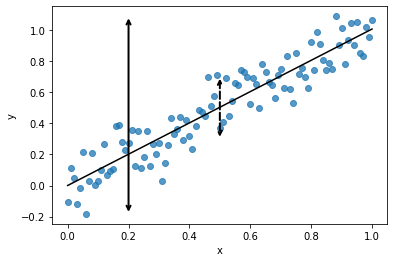

In [15]:
# ## Gauss--Markov Theorem
# ## Goodness of Fit
#	

x = np.linspace(0,1,101)
np.random.seed(123)
y = x + np.random.normal(0,0.1,101)
plt.scatter(x,y,alpha=0.75)
plt.xlabel("x")
plt.ylabel("y")
beta1, beta0 = np.polyfit(x,y,1)
plt.plot([0,1],[beta0,beta0+beta1],"k-")
plt.annotate("",xy=(0.2, min(y)),xytext=(0.2, max(y)),
    arrowprops=dict(arrowstyle="<->",lw=2))
plt.annotate("",xy=(0.5, 0.3),   xytext=(0.5, 0.7),
    arrowprops=dict(arrowstyle="<->",linestyle="--",lw=2))



           coefs stderr tvalues pvalues
Intercept  7.068 19.154    0.37  0.7154
Area      -0.041  0.018   -2.24  0.0349
Elevation  0.319  0.054    5.95  0.0000
Nearest    0.009  1.054    0.01  0.9932
Scruz     -0.241  0.215   -1.12  0.2752
Adjacent  -0.058  0.016   -3.51  0.0018
Adiff      0.017  0.007    2.34  0.0279

n=30 p=6 Residual SD=60.975 R-squared=0.77


LinAlgError: ignored

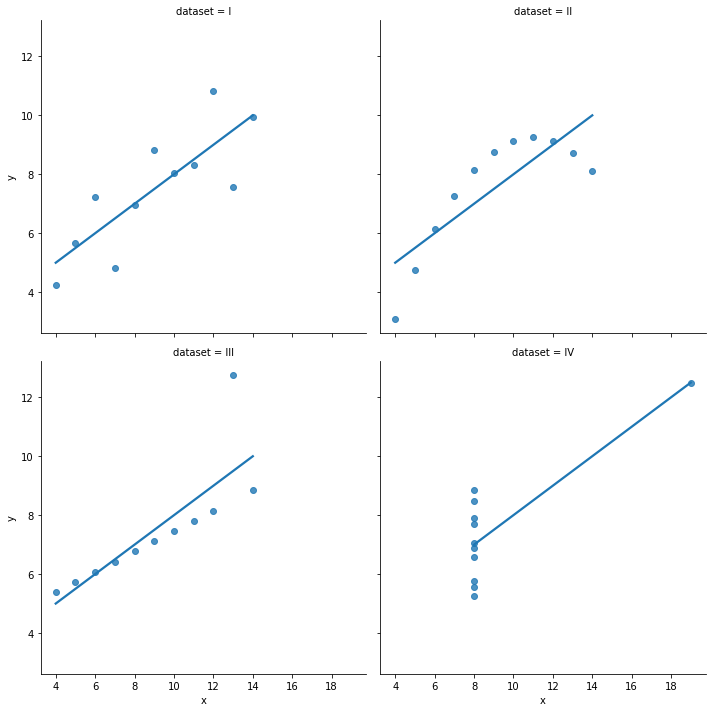

In [16]:

#	

df = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", col="dataset", 
    data=df, col_wrap=2, ci=None)


#	

df.groupby("dataset").corr().iloc[0::2,-1]**2


# ## Identifiability
#	

galapagos['Adiff'] = galapagos['Area'] - galapagos['Adjacent']


#	

lmodform = smf.ols(
   'Species ~ Area+Elevation+Nearest+Scruz+Adjacent+Adiff', 
   galapagos)
lmod = lmodform.fit()
lmod.sumary()


#	

lmod.eigenvals[-1]


#	

lmod = lmodform.fit(method="qr")
lmod.sumary()


#	

np.random.seed(123)
galapagos['Adiffe'] = galapagos['Adiff'] + \
   (np.random.rand(30)-0.5)*0.001 


#	

lmod = smf.ols(
    'Species ~ Area+Elevation+Nearest+Scruz+Adjacent+Adiffe', 
    galapagos).fit()
lmod.sumary()


# ## Orthogonality
#	

import faraway.datasets.odor
odor = faraway.datasets.odor.load()


#	

odor.iloc[:,1:].cov()


#	

lmod = smf.ols('odor ~ temp + gas + pack', odor).fit()
lmod.params


#	

odor.iloc[:,1:].cov()


#	

lmod = smf.ols('odor ~ gas + pack', odor).fit()
lmod.params


# ## Exercises

# ## Packages Used

import sys
import matplotlib
import statsmodels as sm
import seaborn as sns
print("Python version:{}".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("statsmodels version: {}".format(sm.__version__))
print("seaborn version: {}".format(sns.__version__))

    